In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pickle
import random

rng = np.random.default_rng(926334)

In [1]:
ROOT = 'C:/Users/Matt/Documents/Python Scripts/SnowComp/realtime/'
MODIS_CNN_PATH = ROOT + 'model_32_18_8_3_0.13_50_1399_0.0001' #'modis_model'

import sys
sys.path.append(ROOT)

import torch
import captum.attr as attrib
from modis_cnn import Net as ModisNet

net_kwargs = {'cdim1': 32,
              'cdim2': 18,
              'cdim3': 8,
              'kernel_sz': 3,
              'dropout': 0.13,
              'ldim': 50}


modis_net = ModisNet(**net_kwargs)
modis_net.load_state_dict(torch.load(MODIS_CNN_PATH))

c1 dim: 19
mp0 dim: 17
c2 dim: 15
mp1 dim: 13
c3 dim: 11
mp2 dim: 9
flattened_dim 648


<All keys matched successfully>

TypeError: Invalid shape (3, 3, 2) for image data

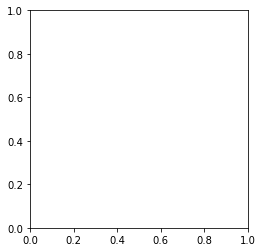

In [124]:
plt.imshow(np.stack((image[0,0,0:3,0:3],image[0,0,0:3,0:3]), axis = 2))

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

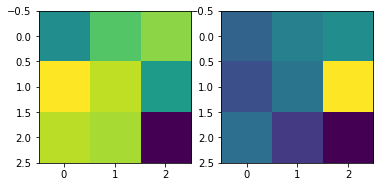

In [132]:
#testing, delete
image = attribution

masked_values(image)


In [131]:
#plotting helper
def masked_values(image):
    '''takes single channel image value:0...255
    returns ax object with masked value >100 plotted as red'''
    fig, ax  = plt.subplots(1,2)
    
    image[image > 100] = np.nan
    
    current_cmap = cm.get_cmap().copy()
    current_cmap.set_bad(color='red')
    
    ax[0].imshow(image[0,0,0:3,0:3])
    ax[1].imshow(image[0,1,0:3,0:3])

    return fig, ax
    

## Filter activations

Moving an image in the direction that maximizes a given filter


Morning vs evening Terra vs Aqua?

TODO: turn above 100 into a seperate color (red)

TODO: do for some images

In [48]:
neuron_gb = attrib.NeuronGuidedBackprop(modis_net, modis_net.conv1)
inp = torch.randn(1, 2, 21, 21, requires_grad=True) #2 examples, a+t sats, 21x21

attribution = neuron_gb.attribute(inp, (3,0,0)).numpy() #conv1: (0...32, 0...19, 0...19)

(array([  1.,   4.,   7.,  39., 315.,  59.,  13.,   1.,   0.,   2.]),
 array([-1.8073164 , -1.4197992 , -1.032282  , -0.6447647 , -0.2572475 ,
         0.1302697 ,  0.5177869 ,  0.90530413,  1.2928214 ,  1.6803386 ,
         2.0678558 ], dtype=float32),
 <BarContainer object of 10 artists>)

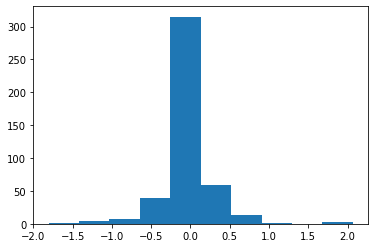

In [137]:
plt.hist(attribution[0,1].flatten())

(1, 2, 21, 21)


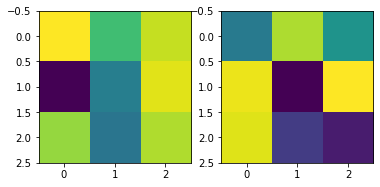

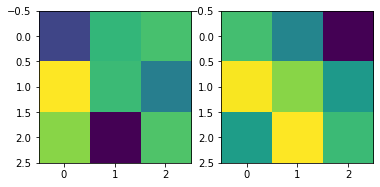

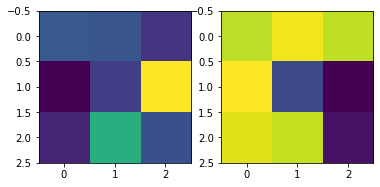

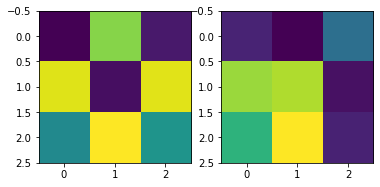

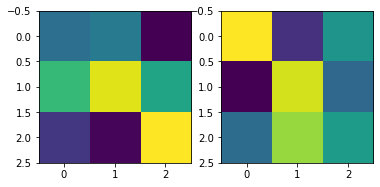

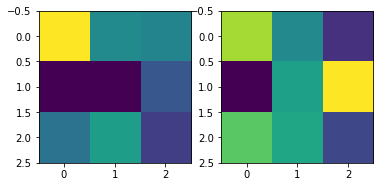

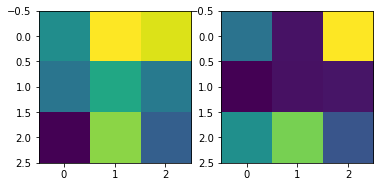

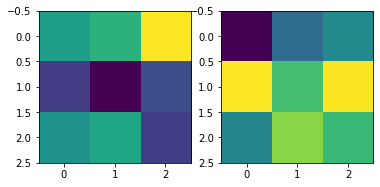

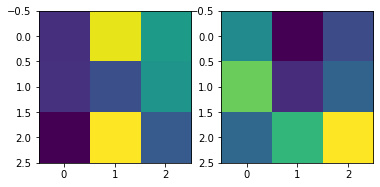

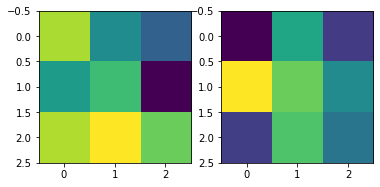

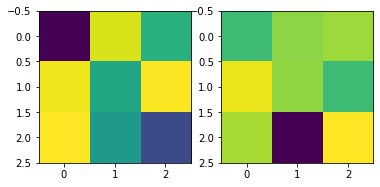

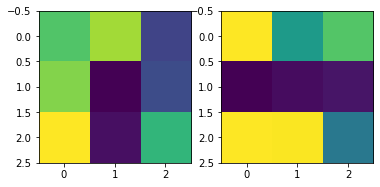

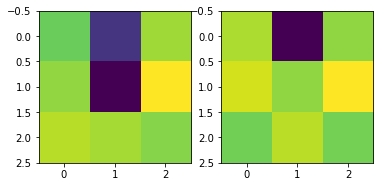

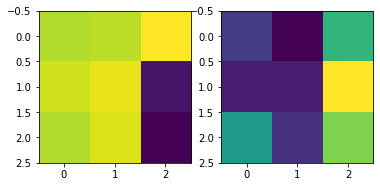

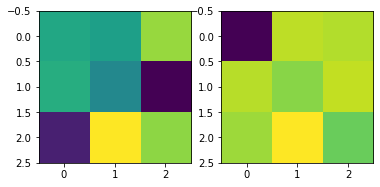

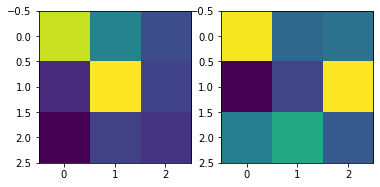

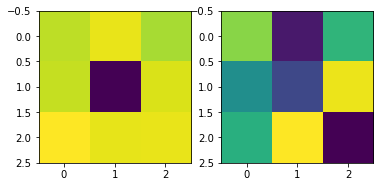

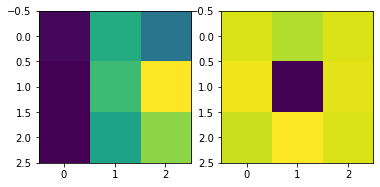

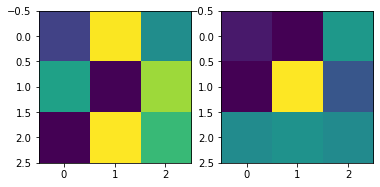

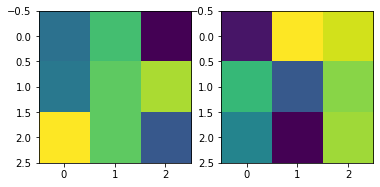

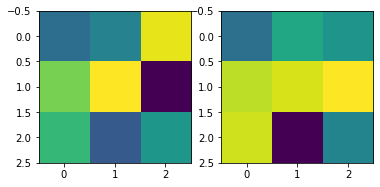

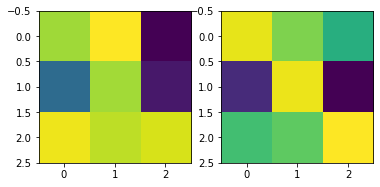

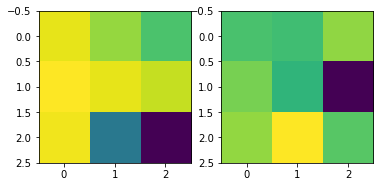

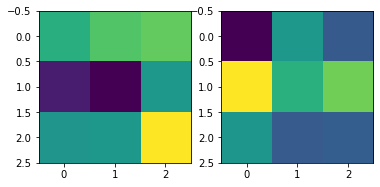

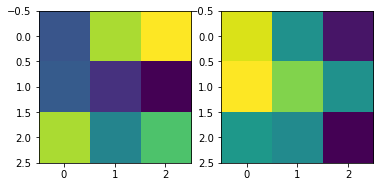

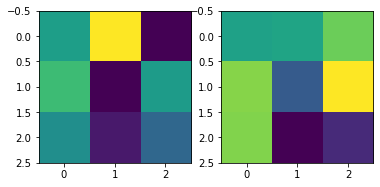

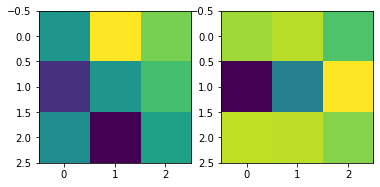

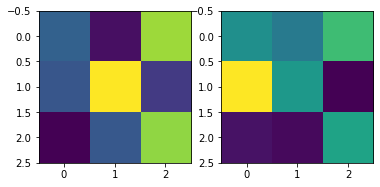

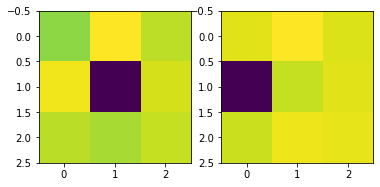

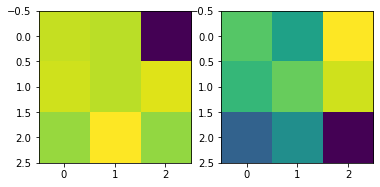

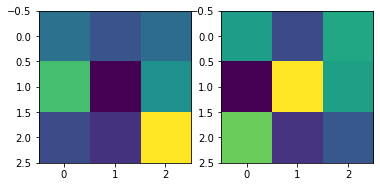

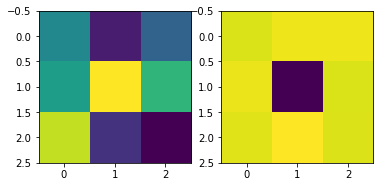

In [53]:
print(attribution.shape)
# plt.imshow(attribution[0,1])

for filt in range(32):
    attribution = neuron_gb.attribute(inp, (filt,0,0)).numpy()
    fig, ax  = plt.subplots(1,2)
    ax[0].imshow(attribution[0,0,0:3,0:3])
    ax[1].imshow(attribution[0,1,0:3,0:3])
    
    plt.show()
    
# attribution = neuron_gb.attribute(inp, (3,0,0))

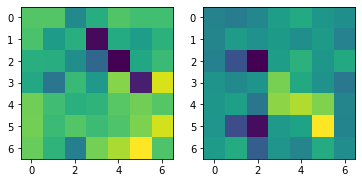

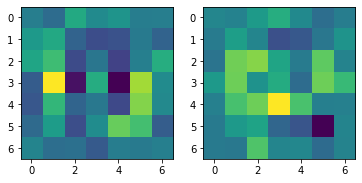

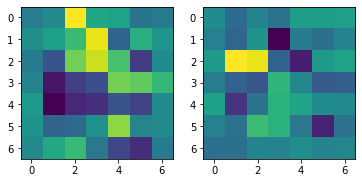

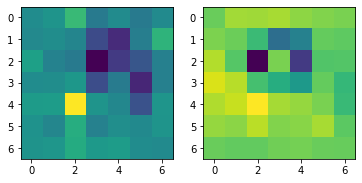

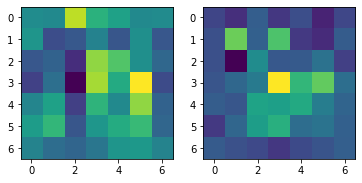

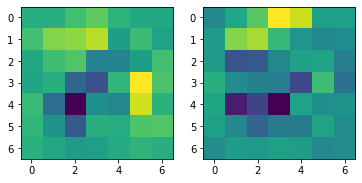

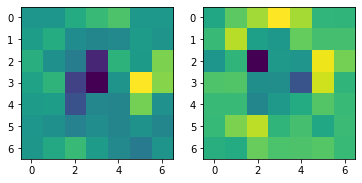

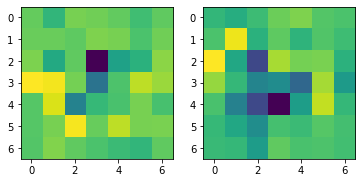

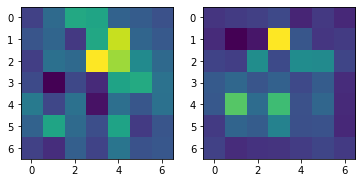

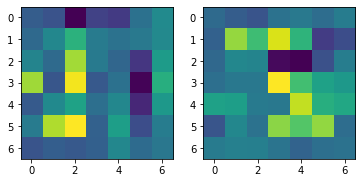

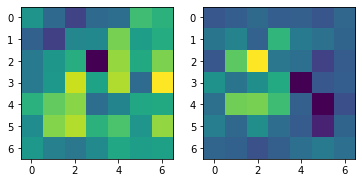

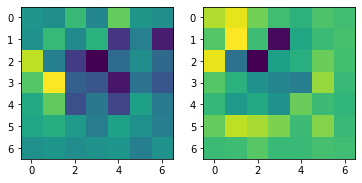

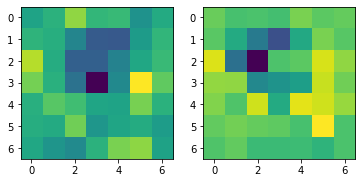

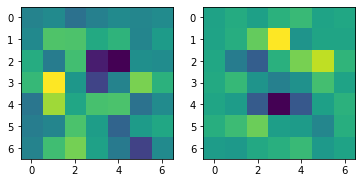

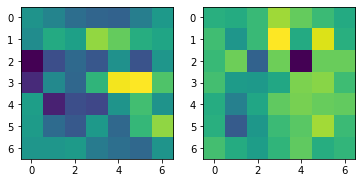

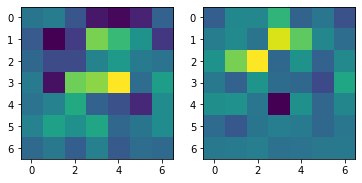

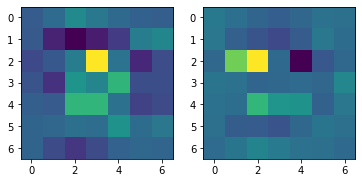

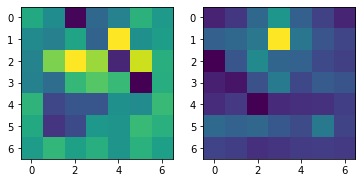

In [99]:
neuron_gb = attrib.NeuronGuidedBackprop(modis_net, modis_net.conv2)
# attribution = neuron_gb.attribute(inp, (3,6,6)).numpy() #conv2: (0...18, 0...15, 0...15)
# print(attribution.shape)
# plt.imshow(attribution[0,1])

for filt in range(18):
    attribution = neuron_gb.attribute(inp, (filt,7,7)).numpy()
    fig, ax  = plt.subplots(1,2)
    ax[0].imshow(attribution[0,0,7:14,7:14])
    ax[1].imshow(attribution[0,1,7:14,7:14])

#     ax[1].imshow(attribution[0,0])
    
    plt.show()

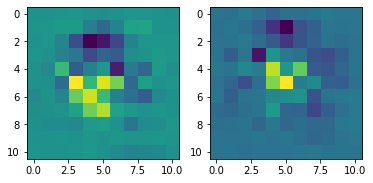

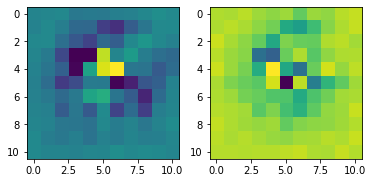

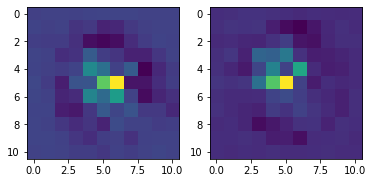

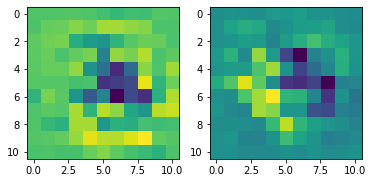

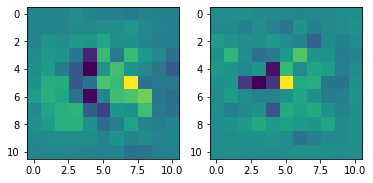

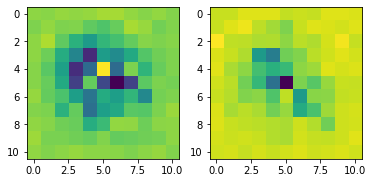

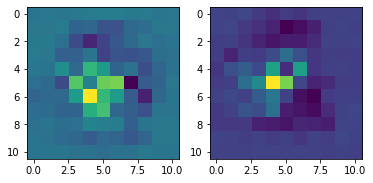

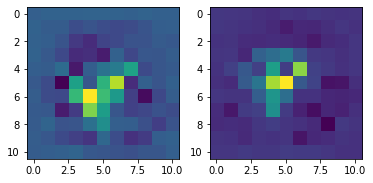

In [107]:
neuron_gb = attrib.NeuronGuidedBackprop(modis_net, modis_net.conv3)
attribution = neuron_gb.attribute(inp, (3,6,6)).numpy() #conv3: (0...8, 0...11, 0...11)
# print(attribution.shape)
# plt.imshow(attribution[0,1])

shift = 11
start = 4
for filt in range(8):
    attribution = neuron_gb.attribute(inp, (filt,start,start)).numpy()
    fig, ax  = plt.subplots(1,2)
    ax[0].imshow(attribution[0,0,start:(start+shift),start:(start+shift)])
    ax[1].imshow(attribution[0,1,start:(start+shift),start:(start+shift)])
#     ax[1].imshow(attribution[0,0])
    
    plt.show()

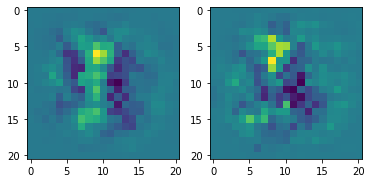

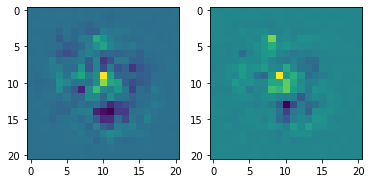

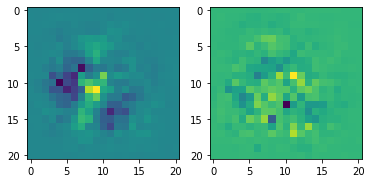

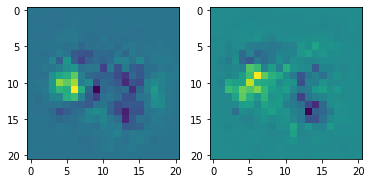

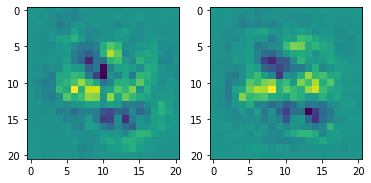

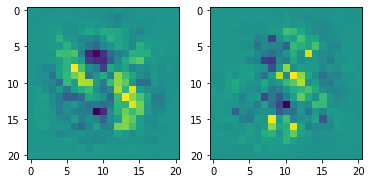

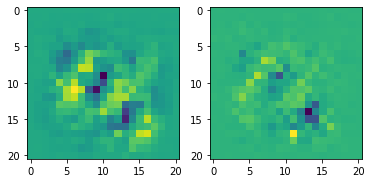

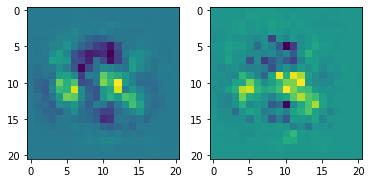

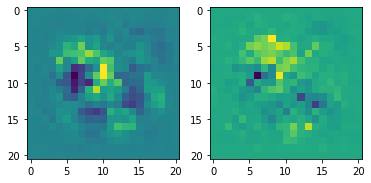

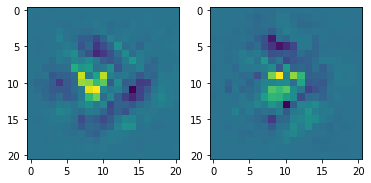

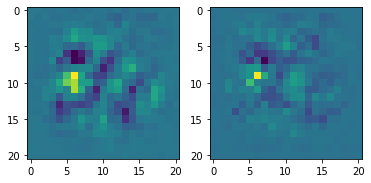

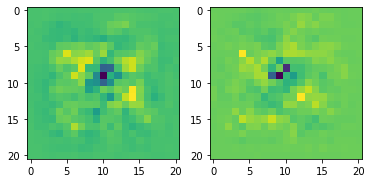

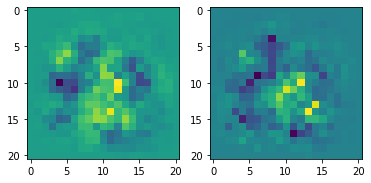

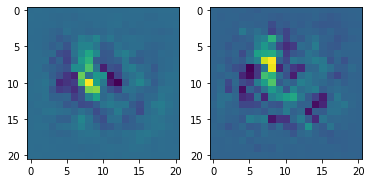

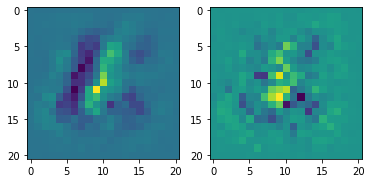

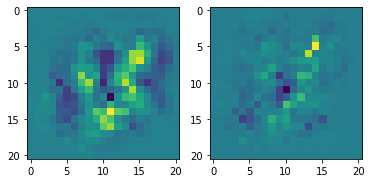

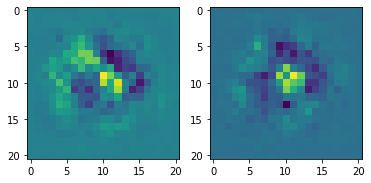

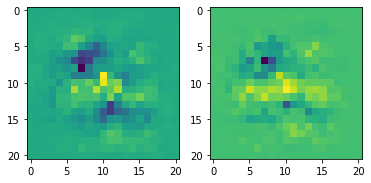

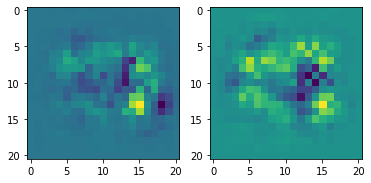

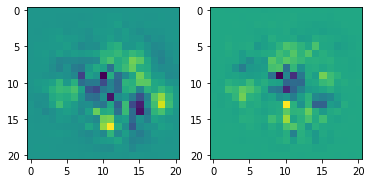

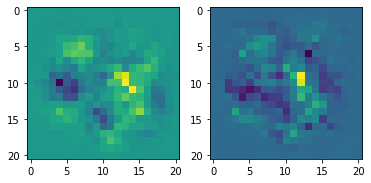

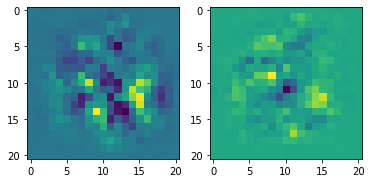

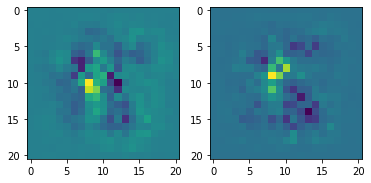

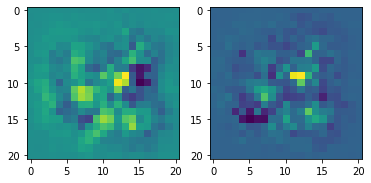

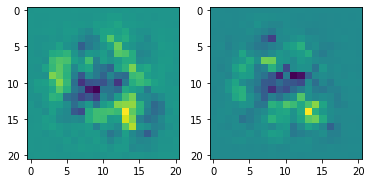

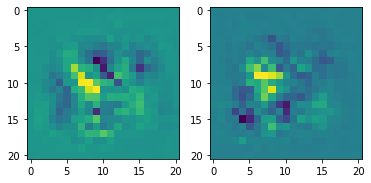

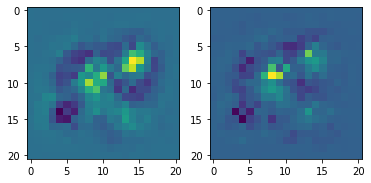

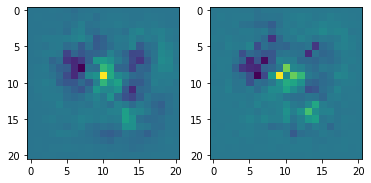

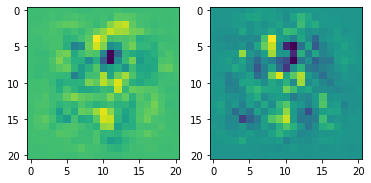

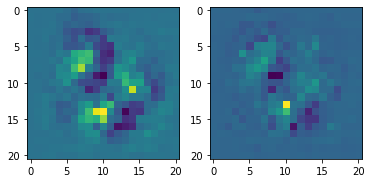

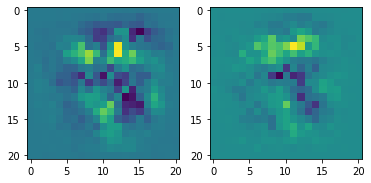

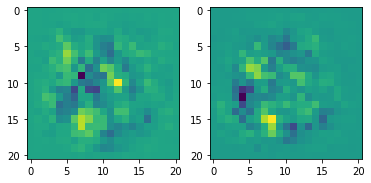

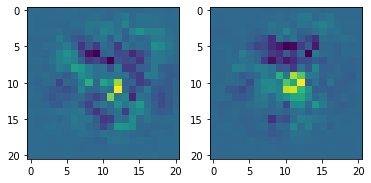

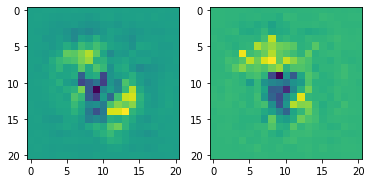

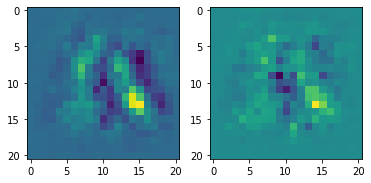

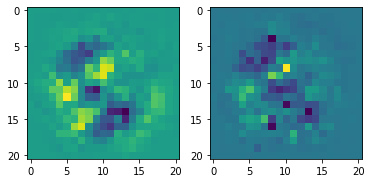

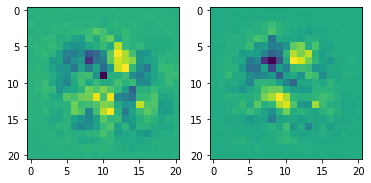

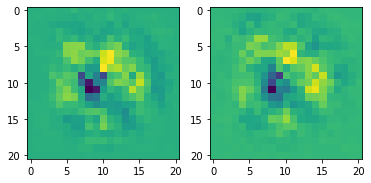

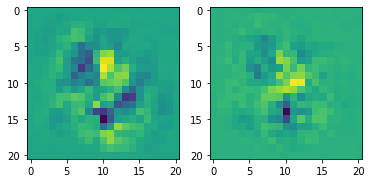

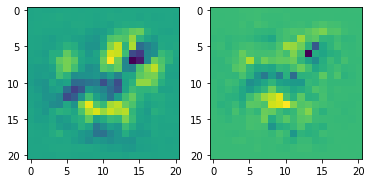

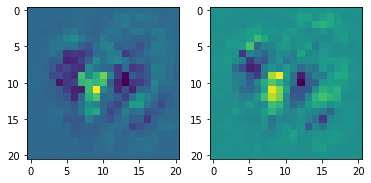

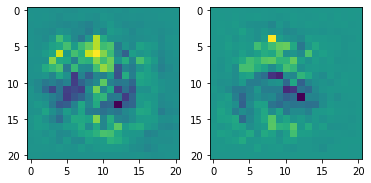

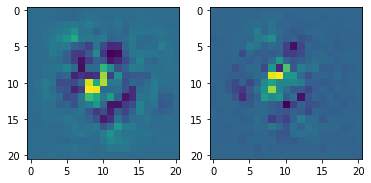

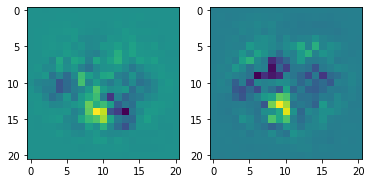

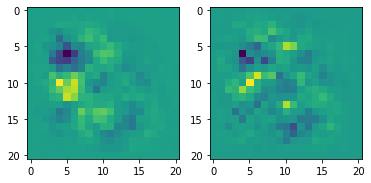

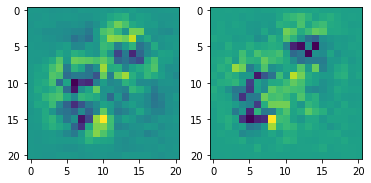

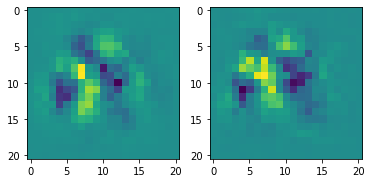

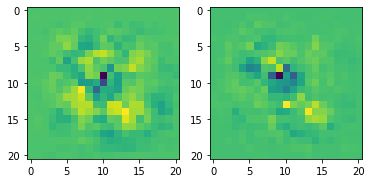

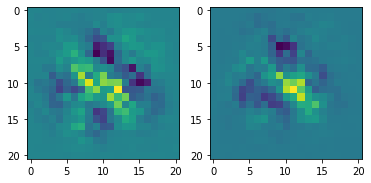

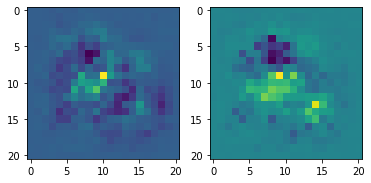

In [110]:
neuron_gb = attrib.NeuronGuidedBackprop(modis_net, modis_net.fc1)
attribution = neuron_gb.attribute(inp, 2).numpy() #fc1: (0...50)
# print(attribution.shape)
# plt.imshow(attribution[0,1])

for filt in range(50):
    attribution = neuron_gb.attribute(inp, filt).numpy()
    fig, ax  = plt.subplots(1,2)
    ax[0].imshow(attribution[0,0])
    ax[1].imshow(attribution[0,1])
#     ax[1].imshow(attribution[0,0])
    
    plt.show()

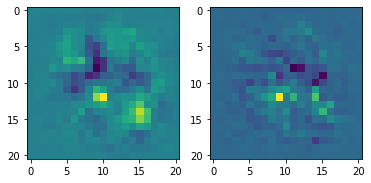

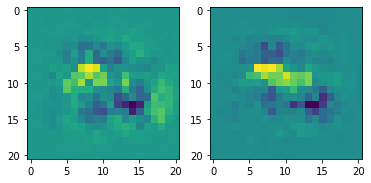

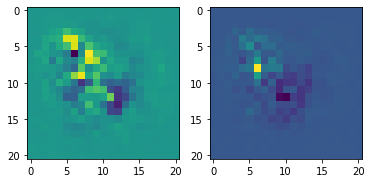

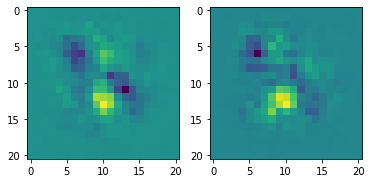

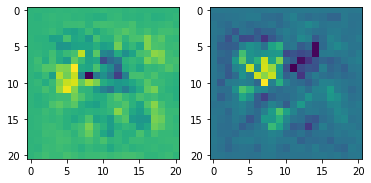

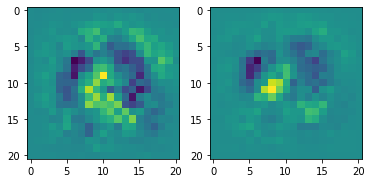

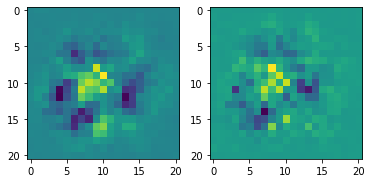

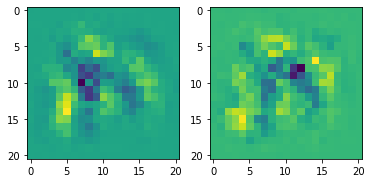

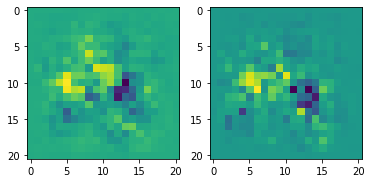

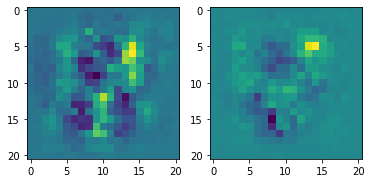

In [115]:
neuron_gb = attrib.NeuronGuidedBackprop(modis_net, modis_net.fc2)
inp_large = torch.randn(10, 2, 21, 21, requires_grad=True)
attribution = neuron_gb.attribute(inp_large, 0).numpy() #fc1: (0...50)

# print(attribution.shape)
# plt.imshow(attribution[0,1])

for ex in range(10):
    attribution = neuron_gb.attribute(inp_large[ex:ex+1], 0).numpy()
    fig, ax  = plt.subplots(1,2)
    ax[0].imshow(attribution[0,0])
    ax[1].imshow(attribution[0,1])
#     ax[1].imshow(attribution[0,0])
    
    plt.show()

## Integrated Gradients